# Week 5 Part 2 Assignment: Document Classification
Group Members: Tora Mullings, Coffy Andrews-Guo

Data Source: [UCI Machine Learning Repository: Spambase Data Set](http://archive.ics.uci.edu/dataset/94/spambas)

In [19]:
import nltk
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from nltk.metrics import ConfusionMatrix
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

Each row is an email. We are predicting whether the email is spam or ham based on its qualities, which are the column values. The last column contains either 1 indicating the email is spam, or 0 for ham.

Which qualities are most important for classifying an email?

In [20]:
# Load data
col_names = ["col"+str(i) for i in range(57)] + ["tag"]
df = pd.read_csv('https://raw.githubusercontent.com/candrewxs/D620/main/Assignment%20Week5Part1/spambase.data', header=0, names = col_names)
df.head()

,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col48,col49,col50,col51,col52,col53,col54,col55,col56,tag
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col0    4600 non-null   float64
 1   col1    4600 non-null   float64
 2   col2    4600 non-null   float64
 3   col3    4600 non-null   float64
 4   col4    4600 non-null   float64
 5   col5    4600 non-null   float64
 6   col6    4600 non-null   float64
 7   col7    4600 non-null   float64
 8   col8    4600 non-null   float64
 9   col9    4600 non-null   float64
 10  col10   4600 non-null   float64
 11  col11   4600 non-null   float64
 12  col12   4600 non-null   float64
 13  col13   4600 non-null   float64
 14  col14   4600 non-null   float64
 15  col15   4600 non-null   float64
 16  col16   4600 non-null   float64
 17  col17   4600 non-null   float64
 18  col18   4600 non-null   float64
 19  col19   4600 non-null   float64
 20  col20   4600 non-null   float64
 21  col21   4600 non-null   float64
 22  

There are 58 columns, all of which are numerical. The first 48 represent the frequency of certain words. The words themselves can be found in the documentation for the data set. They include:
* "free"
* "make"
* "address"
* "all"

The values in these 48 columns range from 0 to 100 and represent a percentage. 

The next six columns represent the frequency of certain characters within the email, such as:
* (
* ; 
* \#

The next three columns contain the following metrics:
* The average length of a run of capital letters
* The length of the longeset run of capital letters
* The sum of length of uninterrupted sequences of capital letters 

Finally, the last column tells whether the email is spam or ham.

### Class Imbalance
* In the data set, how many spam emails are there compared to ham emails?

In [22]:
num_spam = len(df.loc[df["tag"]==1])
num_ham = len(df.loc[df["tag"]==0])
print("Spam emails:", num_spam, "\nHam emails:", num_ham)
print("Percentage ham:", round(num_ham/(num_ham+num_spam), 2))

Spam emails: 1812 
Ham emails: 2788
Percentage ham: 0.61


Ham emails make up the majority class.

### Correlation plot

<AxesSubplot: >

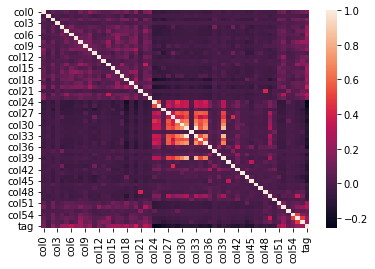

In [23]:
# corr plot
sns.heatmap(df.corr())

### Create training and test sets
* First, without feature engineering.

In [24]:
def extract_features(email_row):
    features = dict()

    for col_name in email_row.index:
        features[col_name] = email_row[col_name]

    return features

In [25]:
df = df.sample(frac=1).reset_index(drop=True)  # shuffle documents
tag = df.iloc[:, 57]
documents = df.iloc[:, :57] 
emails = [(documents.loc[i], tag[i]) for i in range(len(tag))]
train_emails = documents.iloc[:4000, :]
devtest_emails= documents.iloc[4000:4300, :]
test_emails = documents.iloc[4300:, :]

featuresets = [(extract_features(email), tag) for (email,tag) in emails]

train_set, devtest_set, test_set = featuresets[:4000], featuresets[4000:4300], featuresets[4300:]

classifier = nltk.classify.NaiveBayesClassifier.train(train_set)

print(nltk.classify.accuracy(classifier, devtest_set))

#15, 24:48

0.8433333333333334


### Most Informative Features

In [26]:
classifier.show_most_informative_features(5)

Most Informative Features
                   col15 = 0.32                1 : 0      =     26.7 : 1.0
                   col23 = 0.08                1 : 0      =     23.9 : 1.0
                   col12 = 0.3                 1 : 0      =     23.9 : 1.0
                   col23 = 0.09                1 : 0      =     21.9 : 1.0
                   col11 = 0.7                 1 : 0      =     21.5 : 1.0


The most informative feature for this classifier is the last predictor, which is "The sum of length of uninterrupted sequences of capital letters".
Emails in the training set that have a value of 5 for this predictor are ham 26 times more than spam.

### Training and Tests with Feature Engineering
* Normalize last 3 columns using MinMaxScaler

In [27]:
scaler = MinMaxScaler(feature_range=(0,1))  # scale to percentage like the other columns
df[['col54', 'col55', 'col56']] = scaler.fit_transform(df[['col54', 'col55', 'col56']])

In [28]:
df = df.sample(frac=1).reset_index(drop=True)  # shuffle documents
tag = df.iloc[:, 57]
documents = df.iloc[:, :57] 
emails = [(documents.loc[i], tag[i]) for i in range(len(tag))]
train_emails = documents.iloc[:4000, :]
devtest_emails= documents.iloc[4000:4300, :]
test_emails = documents.iloc[4300:, :]

featuresets = [(extract_features(email), tag) for (email,tag) in emails]

train_set, devtest_set, test_set = featuresets[:4000], featuresets[4000:4300], featuresets[4300:]

classifier = nltk.classify.NaiveBayesClassifier.train(train_set)

print(nltk.classify.accuracy(classifier, devtest_set))

#15, 24:48

0.87


After performing normalization, the accuracy increased a few percentage points.

In [29]:
classifier.show_most_informative_features(5)

Most Informative Features
                   col56 = 0.0002525252525252525      0 : 1      =     46.5 : 1.0
                   col12 = 0.3                 1 : 0      =     24.8 : 1.0
                   col15 = 0.32                1 : 0      =     24.6 : 1.0
                   col23 = 0.08                1 : 0      =     22.8 : 1.0
                   col23 = 0.09                1 : 0      =     21.8 : 1.0


After the normalization, the last predictor is still the most informative. It even became more informative.

### Evaluation

In [30]:
X = []
y_actual = []
for predictor_dict, tag in test_set:
    X.append(predictor_dict)
    y_actual.append(tag)

y_pred = classifier.classify_many(X)

In [31]:
cm = ConfusionMatrix(y_actual, y_pred)
print(cm)

  |   0   1 |
--+---------+
0 |<169> 12 |
1 |  30 <89>|
--+---------+
(row = reference; col = test)



The rows are the ground truth, or actual values for emails in the test set. The columns are the predicted values.

In [32]:
num_test_spam = 0
num_test_ham = 0
for predictor_dict, tag in test_set:
    if tag==1:
        num_test_spam+=1
    else:
        num_test_ham+=1

print("Spam emails (test):", num_test_spam, "\nHam emails (test):", num_test_ham)
print("Percentage ham (test):", round(num_test_ham/(num_test_ham+num_test_spam), 2))

Spam emails (test): 119 
Ham emails (test): 181
Percentage ham (test): 0.6


In [33]:
fmeasure = round(cm.f_measure(1),2)
precision = round(cm.precision(1),2)
recall = round(cm.recall(1),2)

print("F-Measure:", fmeasure)
print("Precision:", precision)
print("Recall:", recall)

F-Measure: 0.81
Precision: 0.88
Recall: 0.75


* Precision, or specificity, is equal to *TP / (TP + FN)* and is the ratio of the number of correct predictions of the value to the number of all predictions of the value.

* Recall, or sensitivity, is equal to *TP / (TP + FP)* and is the ratio of the number of correct predictions of the value to the number of times when the value was the ground-truth.

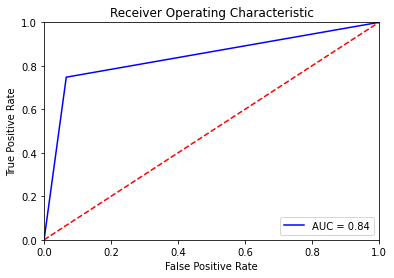

In [34]:

# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_actual, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()